In [211]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

# 0. MNIST data

In [212]:
from tensorflow import keras

### a) Use help() to load data correctly

In [213]:
help(keras.datasets.mnist.load_data)

Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
    
  

### b) Import data and check shapes

In [214]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### c) Number of images i X_train

In [215]:
print(f'Number of images in X_train is {len(X_train)}')

Number of images in X_train is 60000


### d) min and max of a sample image

In [216]:
# values in features denote pixel intensity from black (0) to white (255)
X_train[5].min(), X_train[5].max()

(0, 255)

In [217]:
# labels are digits 0-9
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


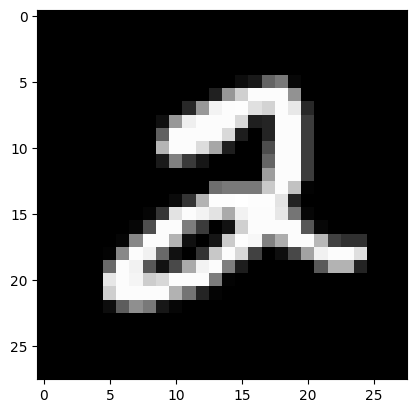

In [218]:
# plotting a randomly chosen sample
plt.imshow(X_train[5], cmap='gray');

### e) plot 20 sample images

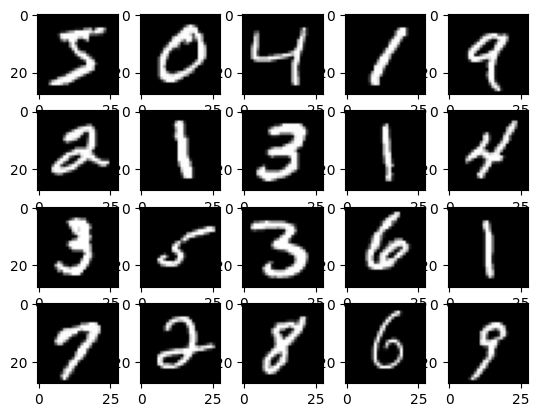

In [305]:
fig, axes = plt.subplots(4, 5)

for i, ax in enumerate(axes.flatten()): #NOTE: code for plotting with flatten()
    ax.imshow(X_train[i], cmap='gray');

# axes.flatten() creates a list-like object ([axes[0][0], axes[0][1], axes[1][0], axes[1][1]], ....)

### f) reshape 3D arrays to 2D arrays

In [220]:
X_train_2D = X_train.reshape(60000, -1)
X_train_2D.shape

(60000, 784)

In [221]:
X_test_2D = X_test.reshape(10000, -1)
X_test_2D.shape

(10000, 784)

# 1. Train|test|val split

In [222]:
from sklearn.model_selection import train_test_split

X_train_50400, X_val, y_train_50400, y_val = train_test_split(X_train, y_train, test_size=0.16, random_state=42)
X_train_50400.shape, X_val.shape, X_test.shape, y_train_50400.shape, y_val.shape, y_test.shape

((50400, 28, 28), (9600, 28, 28), (10000, 28, 28), (50400,), (9600,), (10000,))

In [223]:
# rashaping X data to 2D
X_train_50400_2D = X_train_50400.reshape(len(X_train_50400), -1)
X_val_2D = X_val.reshape(len(X_val), -1)
X_test_2D = X_test.reshape(len(X_test), -1)

X_train_50400_2D.shape, X_val_2D.shape, X_test_2D.shape

((50400, 784), (9600, 784), (10000, 784))

# 2. Hyperparameter tuning of k

In [227]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# scaling all X data
scaler = MinMaxScaler()
scaled_X_train_50400_2D = scaler.fit_transform(X_train_50400_2D)
scaled_X_val_2D = scaler.transform(X_val_2D)
scaled_X_test_2D = scaler.transform(X_test_2D)

# looping to find best k-value
accuracy_score_list = []
for k in range (1,5):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train_50400_2D, y_train_50400)
    y_pred = model.predict(scaled_X_val_2D)
    accuracy_score_list.append(accuracy_score(y_val, y_pred))


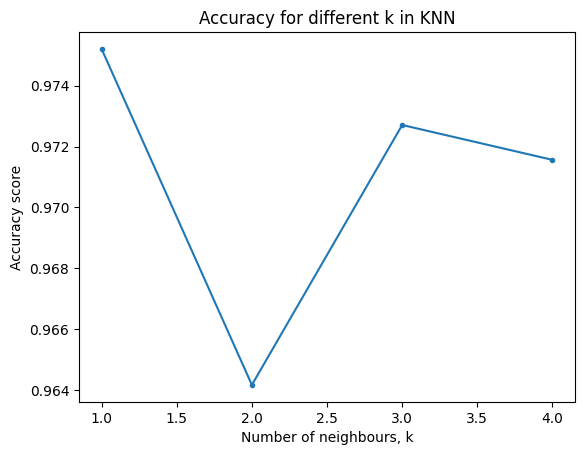

In [228]:
# visualizing
fig, ax = plt.figure(), plt.axes()
ax.plot(range(1,5), accuracy_score_list, '.-');
ax.set(title="Accuracy for different k in KNN", xlabel = "Number of neighbours, k", ylabel= "Accuracy score");

# ??????????k = 3 optimal?  score är lägre för k=3, accuracy_score är lägre för k=1


# 3. Train and predict

In [231]:
X_train_2D.shape, y_train.shape, X_test_2D.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [265]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


# scaling data
scaler = MinMaxScaler()
scaled_X_train_2D = scaler.fit_transform(X_train_2D)
scaled_X_test_2D = scaler.transform(X_test_2D)
print(scaled_X_train_2D.shape, scaled_X_test_2D.shape)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(scaled_X_train_2D, y_train)
y_pred = model.predict(scaled_X_test_2D)

(60000, 784) (10000, 784)


### a). Classification report

In [266]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# recall = TP/(TP+FN)
# 8 has lowest recall, thus high FN

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### b). Heat map

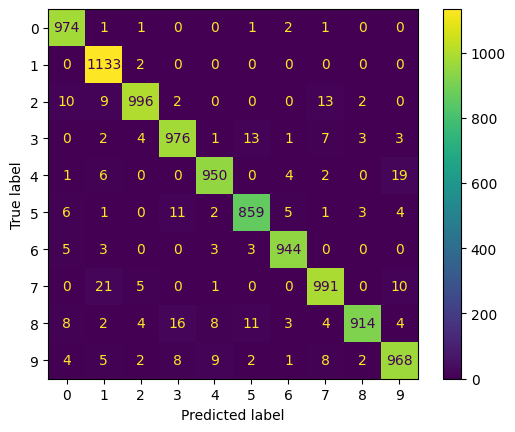

In [290]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### c) Compute number of missclassifictions

In [300]:
for i in range (10):
    missclassification = sum(y_test[y_test != y_pred] == i) # NOTE: interesting code
    print(f'True label {i} has been missclassified in {missclassification} cases')

True label 0 has been missclassified in 6 cases
True label 1 has been missclassified in 2 cases
True label 2 has been missclassified in 36 cases
True label 3 has been missclassified in 34 cases
True label 4 has been missclassified in 32 cases
True label 5 has been missclassified in 33 cases
True label 6 has been missclassified in 14 cases
True label 7 has been missclassified in 37 cases
True label 8 has been missclassified in 60 cases
True label 9 has been missclassified in 41 cases


### d) other metrics

In [310]:
# slow to calculate
print(model.score(scaled_X_train_2D, y_train))
print(model.score(scaled_X_test_2D, y_test))


0.9867166666666667
0.9705


In [319]:
from sklearn.metrics import f1_score

print(accuracy_score(y_test, y_pred)) # seems to be same as model.score(test_data)
print(f1_score(y_test, y_pred, average = 'macro'))

0.9705
0.9703749561556656
